AVERAGE WEIGHTED MODEL OF RECOMMENDATION SYSTEM


THIS ALGORITHM IS MAINLY BASED ON SEARCHING , SORTING AND BASIC IMPLEMENTATION , FORMULA FOR GETTING AVERAGE WEIGHTS RATING

AVG WEIGHTED RATING = ((avg_Rating * vote_cnt)+(vote_Mean * min_Votes))/(vote_cnt+min_Votes)

In [58]:
# Imports
import pandas as pandas_lib
import numpy as numpy_lib
import matplotlib.pyplot as matplotlib_lib
import seaborn as seaborn_lib
import pickle
import requests

In [59]:
data = pandas_lib.read_csv(r'D:\disney-plus-clone-master\Datasets\clean_data.csv')

TIME TO GET THE AVERAGE WEIGHT

In [60]:
vote_Cnt = data['vote_count']

c:\Users\Lokesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

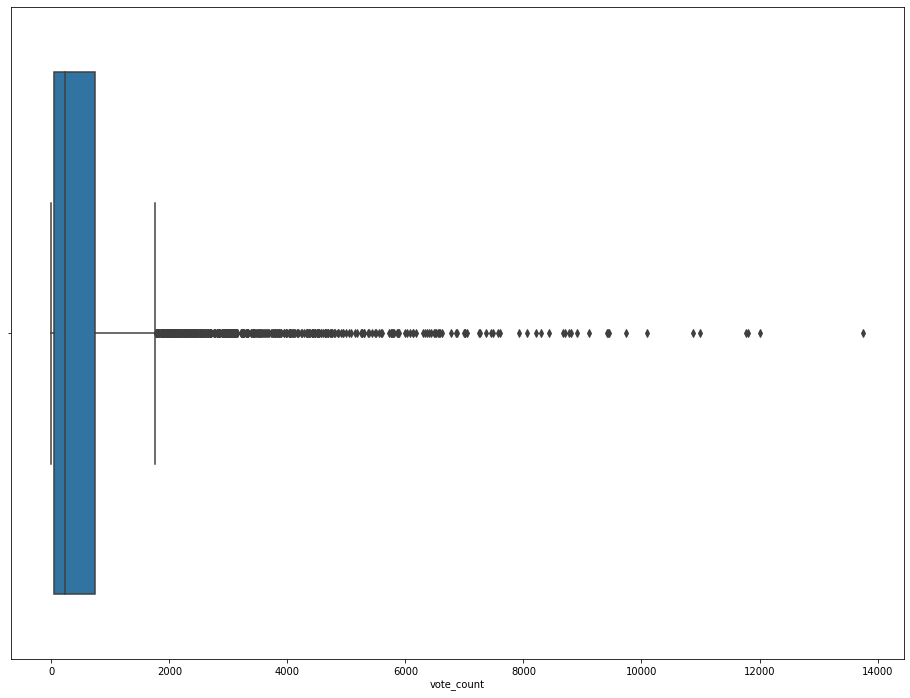

In [61]:
matplotlib_lib.figure(figsize=(16,12))
seaborn_lib.boxplot(vote_Cnt)

In [62]:
# it is a threshold value for 85 percentile 
# min_votes is the minimum no of votes required for each movie
# to be in the top 15 percent movies on the basis of vote counts
# it is a approach to get the better results
min_Votes = vote_Cnt.quantile(0.85)
min_Votes

1300.6999999999998

In [63]:
changed_data = data[data['vote_count']>=1300]
changed_data.shape

(722, 19)

In [64]:
vote_Mean = changed_data['vote_average'].mean()

FIND AVERAGE WEIGHTED RATING USING VARIABLES MADE IN LAST CODES


In [65]:
def weighted_avg_rating(x):
    vote_cnt = x['vote_count']
    avg_Rating = x['vote_average']
    return ((avg_Rating*vote_cnt)+(vote_Mean*min_Votes))/(vote_cnt+min_Votes)

In [66]:
changed_data['avg_weighted'] = changed_data.apply(weighted_avg_rating,axis=1)

C:\Users\Lokesh\AppData\Local\Temp\ipykernel_29772\1690476755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed_data['avg_weighted'] = changed_data.apply(weighted_avg_rating,axis=1)


In [67]:
changed_data.sort_values('avg_weighted',ascending=False).head(1)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,avg_weighted
1881,1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.272083


NOW CHANGED DATA IS SORTED ON THE BASIS OF AVERAGE WEIGHT


In [68]:
avg_weighted_movies = changed_data['id'].head(20)

In [69]:
arr = []
for i in avg_weighted_movies:
    arr.append(i)

In [70]:
# THIS ARE TMDB IDS OF TOP AVERAGE WEIGHTED MOVIES
arr

[19995,
 285,
 206647,
 49026,
 49529,
 559,
 38757,
 99861,
 767,
 209112,
 1452,
 10764,
 58,
 57201,
 49521,
 2454,
 24428,
 1865,
 41154,
 122917]

In [71]:

def fetch_5_det(movie_id):
    apip = "https://api.themoviedb.org/3/movie/{}?api_key=99ffc5d2819f29106760b616189e633a".format(
        movie_id)
    data = requests.get(apip)
    data = data.json()
    poster_path = data['poster_path']
    poster_link = "https://image.tmdb.org/t/p/w500" + poster_path
    mov_year = data['release_date']
    mov_time = data['runtime']
    mov_vote = data['vote_average']
    mov_name = data['original_title']
    mov_over = data['overview']
    return poster_link, mov_year, mov_time, mov_vote , mov_name , mov_over

In [74]:

most_rated_det = [[],[],[],[],[],[]]
for i in arr:
    pic , year , dur , rating , name, overvie = fetch_5_det(i)
    most_rated_det[0].append(pic)
    most_rated_det[1].append(name)
    most_rated_det[2].append(dur)
    most_rated_det[3].append(year)
    most_rated_det[4].append(rating)
    most_rated_det[5].append(overvie)

used but now commented so that when you run , it don't create any extra files


In [75]:
pickle.dump(most_rated_det,open('most_rated.pkl','wb'))

In [76]:
most_rated_det[4]

[7.5,
 7.2,
 6.5,
 7.8,
 6.2,
 6.4,
 7.6,
 7.3,
 7.7,
 5.9,
 5.7,
 6.3,
 7.3,
 6.1,
 6.6,
 6.6,
 7.7,
 6.5,
 6.5,
 7.3]

LETS FIND MOST POPULAR

In [77]:
pop = data.sort_values('popularity' ,ascending=False)

In [78]:
pop.head(1)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
546,546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."


In [80]:
feat = ['original_title','popularity','vote_count','vote_average']

In [79]:
pop[feat].iloc[2]

original_title      Deadpool
popularity        514.569956
vote_count             10995
vote_average             7.4
Name: 788, dtype: object

In [81]:
arr2 = pop['id'].head(20) 

In [82]:
arr2
for i in arr2:
    print(i)

211672
157336
293660
118340
76341
135397
22
119450
131631
177572
87101
271110
244786
155
286217
27205
109445
209112
19995
550


In [84]:
most_pop_det = [[],[],[],[],[],[]]
for i in arr2:
    pic , year , dur , rating , name, overvie = fetch_5_det(i)
    most_pop_det[0].append(pic)
    most_pop_det[1].append(name)
    most_pop_det[2].append(dur)
    most_pop_det[3].append(year)
    most_pop_det[4].append(rating)
    most_pop_det[5].append(overvie)

In [ ]:
# LETS VISUALIZE IT
most_pop_det[0]

['https://image.tmdb.org/t/p/w500/vlOgaxUiMOA8sPDG9n3VhQabnEi.jpg',
 'https://image.tmdb.org/t/p/w500/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg',
 'https://image.tmdb.org/t/p/w500/fSRb7vyIP8rQpL0I47P3qUsEKX3.jpg',
 'https://image.tmdb.org/t/p/w500/r7vmZjiyZw9rpJMQJdXpjgiCOk9.jpg',
 'https://image.tmdb.org/t/p/w500/8tZYtuWezp8JbcsvHYO0O46tFbo.jpg',
 'https://image.tmdb.org/t/p/w500/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg',
 'https://image.tmdb.org/t/p/w500/z8onk7LV9Mmw6zKz4hT6pzzvmvl.jpg',
 'https://image.tmdb.org/t/p/w500/kScdQEwS9jPEdnO23XjGAtaoRcT.jpg',
 'https://image.tmdb.org/t/p/w500/4FAA18ZIja70d1Tu5hr5cj2q1sB.jpg',
 'https://image.tmdb.org/t/p/w500/2mxS4wUimwlLmI1xp6QW6NSU361.jpg',
 'https://image.tmdb.org/t/p/w500/oZRVDpNtmHk8M1VYy1aeOWUXgbC.jpg',
 'https://image.tmdb.org/t/p/w500/rAGiXaUfPzY7CDEyNKUofk3Kw2e.jpg',
 'https://image.tmdb.org/t/p/w500/6uSPcdGNA2A6vJmCagXkvnutegs.jpg',
 'https://image.tmdb.org/t/p/w500/qJ2tW6WMUDux911r6m7haRef0WH.jpg',
 'https://image.tmdb.org/t/p/w500/5BHuvQ6p9kfc09

In [85]:
pickle.dump(most_pop_det,open('most_popular.pkl','wb'))